In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from github import Github
import os

<h1> Visualizations: grouped by x wks ahead visualization. Input a specific model and state (or just "US") your would like to see. <h1>

In [2]:
def plot_model_state(model, state):
    try:
        df_real_cum_death = pd.read_csv('./Ground Truth/cum_death.csv')
        df_real_cum_death.set_index(["Province_State"],inplace=True)
        
        df_cum_death = pd.read_csv('./Predictions/' + model + '/' + model + '_cum_death.csv')
        df_cum_death.set_index(["state", "# weeks ahead"],inplace=True)
        weeks_ahead = list(dict.fromkeys(df_cum_death.loc[(state,)].index))
        
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=12))
        date = [datetime.strptime(d, '%Y-%m-%d').date() for d in df_real_cum_death.columns]
        plt.plot(date,df_real_cum_death.loc[state],'r')
        
        legend_list = ['Cum Deaths']
        for num in weeks_ahead:
            legend_list.append(str(num) + " wk ahead")
            date = [datetime.strptime(d, '%Y-%m-%d').date() for d in df_cum_death.loc[[(state,num)]]["target_end_date"]]
            plt.plot(date,df_cum_death.loc[(state,num)]["mean"],'o-')
        
        plt.legend(legend_list,bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel("Date")
        plt.ylabel("Cases")
        plt.title(model + ": " + state + " Cum Deaths")
        plt.gcf().autofmt_xdate()
        plt.show()  
    except FileNotFoundError: 
        print("They do not predict cum death.")
        
    try:
        df_real_inc_death = pd.read_csv('./Ground Truth/inc_death.csv')
        df_real_inc_death.set_index(["Province_State"],inplace=True)
    
        df_inc_death = pd.read_csv('./Predictions/' + model + '/' + model + '_inc_death.csv')
        df_inc_death.set_index(["state", "# weeks ahead"],inplace=True)
        weeks_ahead = list(dict.fromkeys(df_inc_death.loc[(state,)].index))
        
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=12))
        date = [datetime.strptime(d, '%Y-%m-%d').date() for d in df_real_inc_death.columns]
        plt.plot(date,df_real_inc_death.loc[state],'r')
        
        legend_list = ['Inc Deaths']
        for num in weeks_ahead:
            legend_list.append(str(num) + " wk ahead")
            date = [datetime.strptime(d, '%Y-%m-%d').date() for d in df_inc_death.loc[[(state,num)]]["target_end_date"]]
            plt.plot(date,df_inc_death.loc[(state,num)]["mean"],'o-')
        
        plt.legend(legend_list,bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel("Date")
        plt.ylabel("Cases")
        plt.title(model + ": " + state + " Inc Deaths")
        plt.gcf().autofmt_xdate()
        plt.show()  
    except FileNotFoundError: 
        print("They do not predict inc death.")
        
    try:
        df_real_inc_case = pd.read_csv('./Ground Truth/inc_case.csv')
        df_real_inc_case.set_index(["Province_State"],inplace=True)
        
        df_inc_case = pd.read_csv('./Predictions/' + model + '/' + model + '_inc_case.csv')
        df_inc_case.set_index(["state", "# weeks ahead"],inplace=True)
        weeks_ahead = list(dict.fromkeys(df_inc_case.loc[(state,)].index))
        
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=12))
        date = [datetime.strptime(d, '%Y-%m-%d').date() for d in df_real_inc_case.columns]
        plt.plot(date,df_real_inc_case.loc[state],'r')
        
        legend_list = ['Cum Deaths']
        for num in weeks_ahead:
            legend_list.append(str(num) + " wk ahead")
            date = [datetime.strptime(d, '%Y-%m-%d').date() for d in df_inc_case.loc[[(state,num)]]["target_end_date"]]
            plt.plot(date,df_inc_case.loc[(state,num)]["mean"],'o-')
        
        plt.legend(legend_list,bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel("Date")
        plt.ylabel("Cases")
        plt.title(model + ": " + state + " Inc Case")
        plt.gcf().autofmt_xdate()
        plt.show()  
    except FileNotFoundError: 
        print("They do not predict inc case.")
    

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.


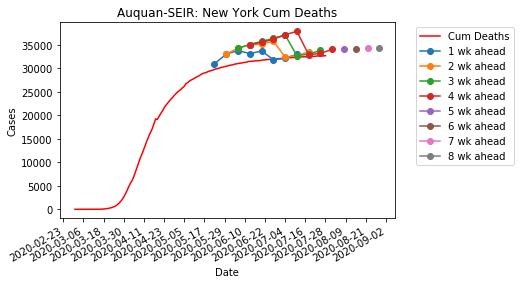

They do not predict inc death.
They do not predict inc case.


In [3]:
plot_model_state("Auquan-SEIR", "New York")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.


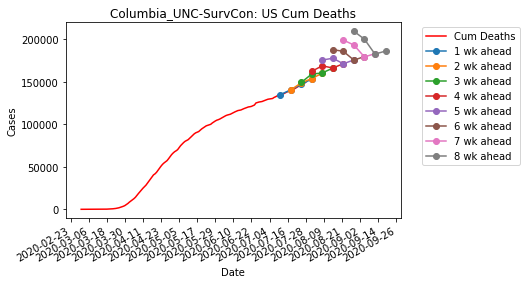

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.


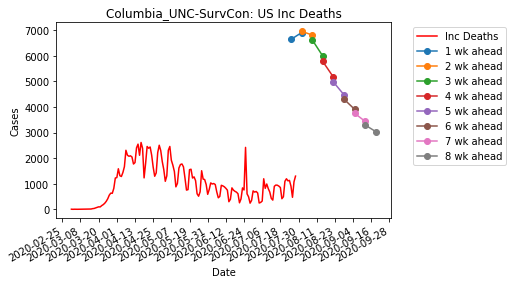

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: indexing past lexsort depth may impact performance.


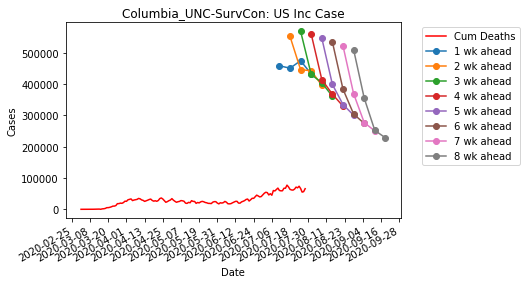

In [4]:
plot_model_state("Columbia_UNC-SurvCon", "US")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.


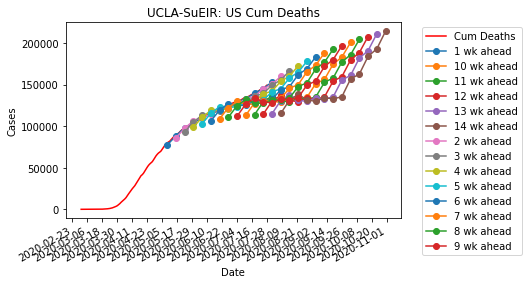

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.


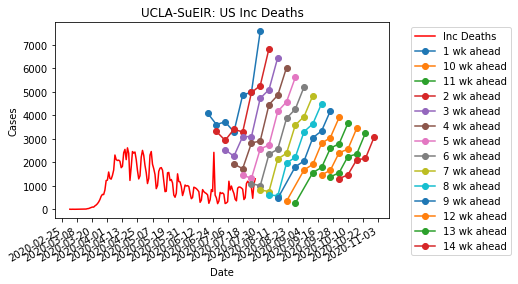

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: indexing past lexsort depth may impact performance.


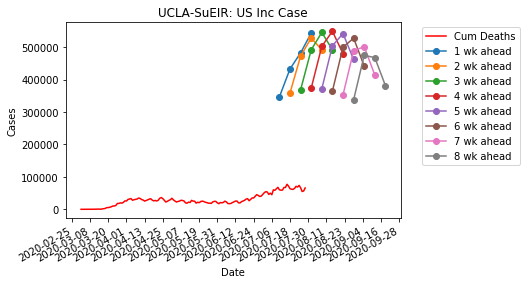

In [5]:
plot_model_state("UCLA-SuEIR", "US")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.


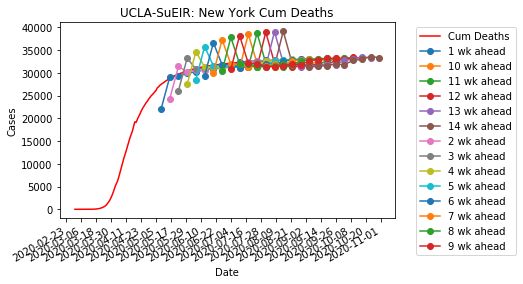

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.


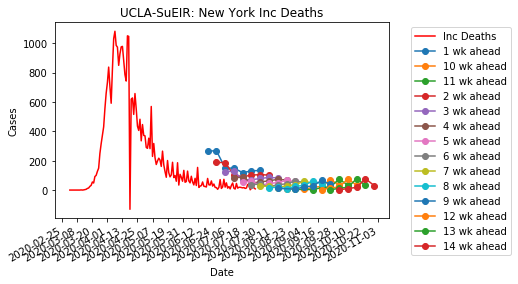

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: indexing past lexsort depth may impact performance.


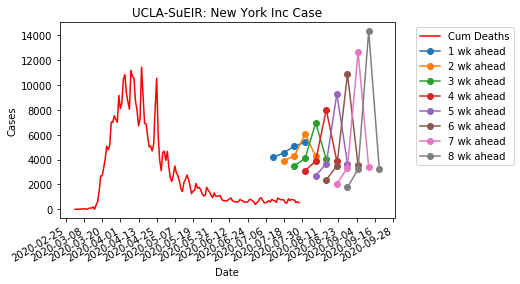

In [6]:
plot_model_state("UCLA-SuEIR", "New York")